In [1]:
# Trabalho 4 - Image Restoration
# SCC0251 - Image Processing (01/2021)
# Fabiana Dalacqua Mendes - 9894536
# Pedro Henrique Nieuwenhoff - 10377729
import numpy as np
import imageio
import math

In [2]:
import matplotlib.pyplot as plt

In [7]:
def normalized_histogram(img,b):
    n,m,z = img.shape
    k = 2**b # level of intensity (or color)  
    
    dc = np.zeros(k, dtype=int)

    for i in range(k):
        dc[i] = np.sum(img == i) / n*m # h(k) / total number of pixels in image

    dc = dc / np.linalg.norm(dc)
    
    return dc

In [4]:
def quantization(img,b): # tem algo errado aqui
    img = np.array(img, copy=True).astype(np.uint8)
    B = 8 - b # bitwise shift
    return img >> B # shift right

def normalize_minmax(f, factor):
    f_min = np.min(f)
    f_max = np.max(f)
    f = (f - f_min)/(f_max-f_min)
    return (f*factor)

def luminance(img):
    img = np.array(img, copy=True).astype(float)
    # computing conversion
    new_img = np.zeros((img.shape[0], img.shape[1]))
    new_img = img[:,:,0]*0.299 + img[:,:,1]*0.587 + img[:,:,2]*0.114
    new_img = normalize_minmax(new_img, 255)
    return new_img

In [5]:
def image_descriptors():
    """
    Inputs (in this order)
    ----------------------
    obj_filename : string
        The ilename for the image with the object
    img_filename : string
        The filename for the larger imageg,
    b : int
        The number of bits after quantisation
    """
    
    # getting input parameters
    obj_filename = str(input().rstrip())
    #img_filename = str(input().rstrip())
    b = int(input())
    
    # reading images as uint8 array
    obj_img = imageio.imread(obj_filename)
    #img = imageio.imread(img_filename)
    
    new_img = luminance(obj_img)
    new_img = quantization(obj_img,b)
    dc = normalized_histogram(obj_img,b)
    
    print(dc)
    
    plt.imshow(new_img,cmap="gray")
    

imgs/wally.png
3
[0.45226702 0.15075567 0.30151134 0.         0.45226702 0.30151134
 0.15075567 0.60302269]


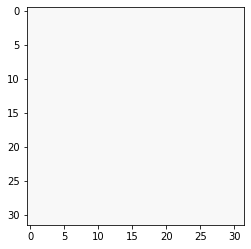

In [8]:
if __name__ == "__main__":
    image_descriptors()

In [ ]:
"""
imgs/wally.png
imgs/wheres_wally.png
3"""